# Reservoir Computing 

In [2]:
# Install our reservoir computing package for data generation only
import rescomp as rc
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import integrate, sparse
import math 
import networkx as nx
import itertools

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = [20, 5]

# Set seed for reproducibility
np.random.seed(1)

# Diversity Metric Imports
from math import comb

### Training Data

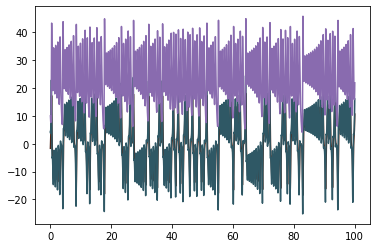

In [3]:
t, U = rc.orbit("lorenz", duration=100)
plt.rcParams["figure.figsize"] = [20, 5]
colors = rc.plot2d(t, U)

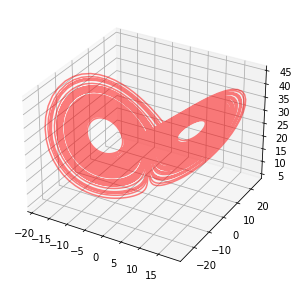

In [4]:
plt.rcParams["figure.figsize"] = [20, 5]
_ = rc.plot3d(U, color="red")

## Reservoir Computer Idea

### Reservoir Computer with Highly Connected Network

In [5]:
# Interpolate data
u = CubicSpline(t, U)
U_train = u(t[:9000])


# Parameters
n = 50
gamma = 5
sigma = 0.14
mean_degree = 1
density = mean_degree / n
alpha = 1e-6
rho = 50

# Directed Erdos-Renyi adjacency matrix
A = (np.random.rand(n, n) < density).astype(float)
# Fixed random matrix
W_in = np.random.rand(n, 3) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:9000])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[9000:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

### Reservoir Internal States

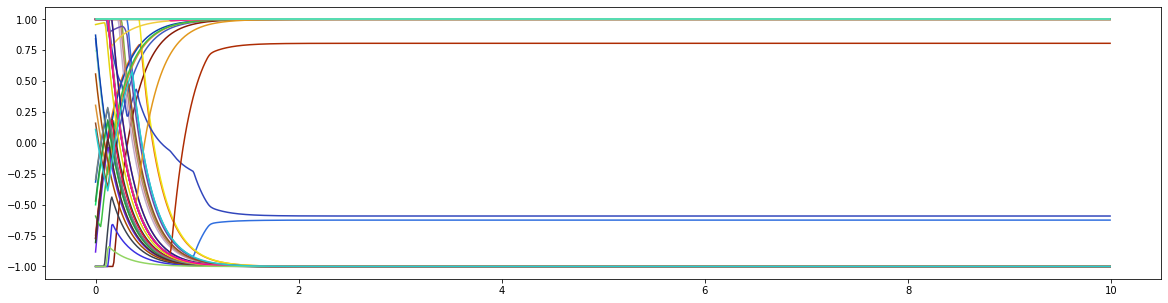

In [6]:
plt.rcParams["figure.figsize"] = [20, 5]
rc.plot2d(t[:1000], pred_states[:1000])
plt.show()

### Reservoir Prediction

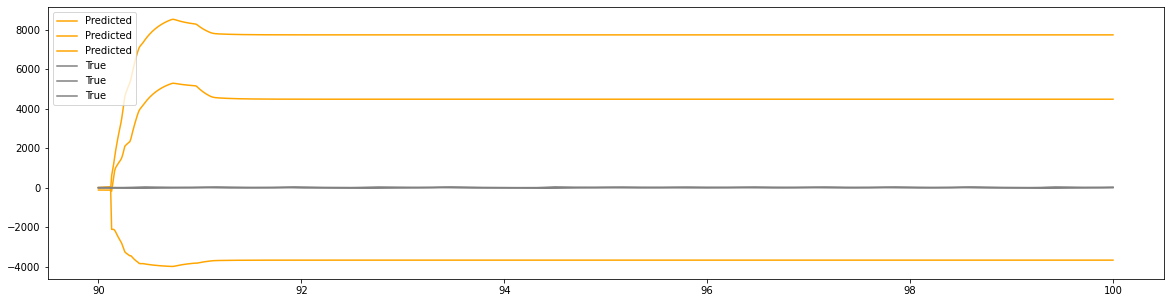

In [7]:
test_t = t[9000:]
plt.rcParams["figure.figsize"] = [20, 5]
plt.plot(test_t, U_pred.T, c="orange", label="Predicted");
plt.plot(test_t, u(test_t), c="gray", label="True");
plt.legend()
plt.show()

### Reservoir Attractor Reconstruction

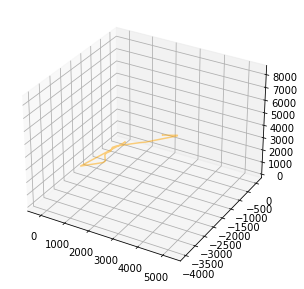

In [8]:
_ = rc.plot3d(U_pred.T, color="orange")

### Reservoir Computer with Zero Edges

In [9]:
# Interpolate data
u = CubicSpline(t, U)
U_train = u(t[:9000])


# Parameters
n = 50
gamma = 5
sigma = 0.14
alpha = 1e-6
rho = 50

# Adjacency matrix with zero edges
A = np.zeros((n, n))

######################################################
# The rest of the code is exactly the same as before #
######################################################

# Fixed random matrix
W_in = np.random.rand(n, 3) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:9000])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[9000:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

### Zero Edge Reservoir Internal States

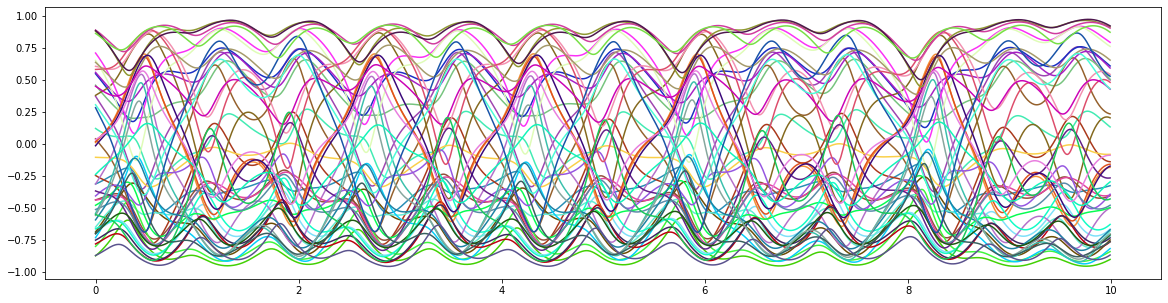

array([[0.25872171, 0.92163692, 0.70206946],
       [0.61893042, 0.27300884, 0.69584846],
       [0.25721475, 0.81645267, 0.01147246],
       [0.16653764, 0.55782899, 0.712281  ],
       [0.49248065, 0.8778095 , 0.97586994],
       [0.46427707, 0.76798698, 0.49477213],
       [0.66509878, 0.22487498, 0.10954172],
       [0.97900894, 0.81499466, 0.28538353],
       [0.58582838, 0.38007121, 0.17633804],
       [0.41883514, 0.29718779, 0.01662411],
       [0.38736831, 0.920913  , 0.82820026],
       [0.57407476, 0.31864686, 0.23126429],
       [0.95601958, 0.5646101 , 0.2176053 ],
       [0.24948205, 0.9595962 , 0.23881413],
       [0.10671409, 0.18396194, 0.76622481],
       [0.70876426, 0.43794192, 0.79380451],
       [0.51751269, 0.41359816, 0.11744194],
       [0.88391107, 0.27559321, 0.61626072],
       [0.98457978, 0.18941802, 0.96518799],
       [0.65271537, 0.1287316 , 0.77192715],
       [0.95177578, 0.56278055, 0.6885552 ],
       [0.02634788, 0.98907569, 0.31845712],
       [0.

In [10]:
plt.rcParams["figure.figsize"] = [20, 5]
rc.plot2d(t[:1000], pred_states[:1000])

### Zero Edge Reservoir Prediction

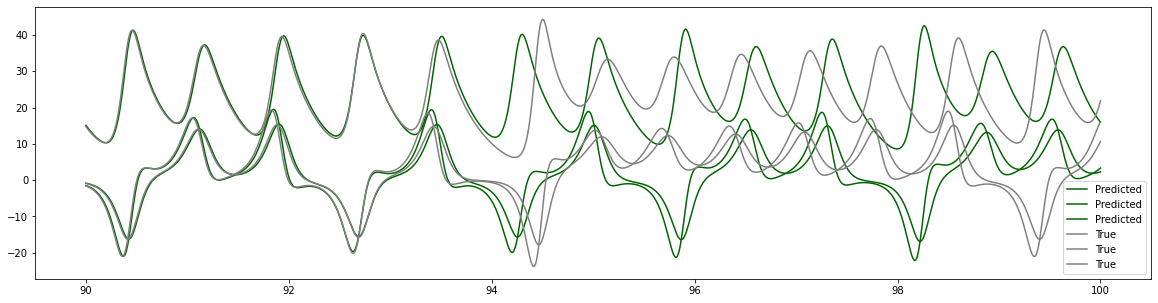

In [11]:
test_t = t[9000:]
plt.rcParams["figure.figsize"] = [20, 5]
plt.plot(test_t, U_pred.T, c="darkgreen", label="Predicted")
plt.plot(test_t, u(test_t), c="gray", label="True")
plt.legend()
plt.show()

### Zero Edge Reservoir Attractor Reconstruction

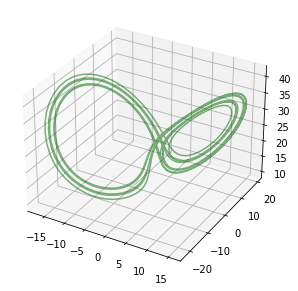

In [12]:
plt.rcParams["figure.figsize"] = [20, 5]
_ = rc.plot3d(U_pred.T, color="darkgreen")

### Explore Data

In [13]:
data_path = 'sc-agg-f16.npz'
data = np.load(data_path)
print(data.__dir__())

['_files', 'files', 'allow_pickle', 'max_header_size', 'pickle_kwargs', 'zip', 'f', 'fid', '__module__', '__doc__', '_MAX_REPR_ARRAY_COUNT', '__init__', '__enter__', '__exit__', 'close', '__del__', '__iter__', '__len__', '__getitem__', '__contains__', '__repr__', '__dict__', '__weakref__', '__abstractmethods__', '_abc_impl', '__slots__', 'get', 'keys', 'items', 'values', '__eq__', '__reversed__', '__hash__', '__subclasshook__', '__new__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__reduce__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '__class_getitem__']


In [14]:
train_patients = data['train_patients']
train_patients

array(['SC4241', 'SC4242', 'SC4001', 'SC4002', 'SC4271', 'SC4272',
       'SC4761', 'SC4762', 'SC4021', 'SC4022', 'SC4341', 'SC4342',
       'SC4011', 'SC4012', 'SC4411', 'SC4412', 'SC4281', 'SC4282',
       'SC4431', 'SC4432', 'SC4041', 'SC4042', 'SC4081', 'SC4082',
       'SC4731', 'SC4732', 'SC4631', 'SC4632', 'SC4121', 'SC4122',
       'SC4051', 'SC4052', 'SC4061', 'SC4062', 'SC4031', 'SC4032',
       'SC4091', 'SC4092', 'SC4771', 'SC4772', 'SC4211', 'SC4212',
       'SC4451', 'SC4452', 'SC4251', 'SC4252', 'SC4111', 'SC4112',
       'SC4371', 'SC4372', 'SC4171', 'SC4172', 'SC4561', 'SC4562',
       'SC4471', 'SC4472', 'SC4581', 'SC4582', 'SC4741', 'SC4742',
       'SC4231', 'SC4232', 'SC4522', 'SC4751', 'SC4752', 'SC4651',
       'SC4652', 'SC4611', 'SC4612', 'SC4151', 'SC4152', 'SC4321',
       'SC4322', 'SC4701', 'SC4702'], dtype='<U6')

In [15]:
labels = data['labels']
labels

array(['EEG FPZ-CZ-2.5hz', 'EEG FPZ-CZ-5.0hz', 'EEG FPZ-CZ-7.5hz',
       'EEG FPZ-CZ-10.0hz', 'EEG FPZ-CZ-12.5hz', 'EEG FPZ-CZ-15.0hz',
       'EEG FPZ-CZ-17.5hz', 'EEG FPZ-CZ-20.0hz', 'EEG FPZ-CZ-22.5hz',
       'EEG FPZ-CZ-25.0hz', 'EEG FPZ-CZ-27.5hz', 'EEG FPZ-CZ-30.0hz',
       'EEG FPZ-CZ-32.5hz', 'EEG FPZ-CZ-35.0hz', 'EEG FPZ-CZ-37.5hz',
       'EEG FPZ-CZ-40.0hz', 'EEG FPZ-CZ-42.5hz', 'EEG FPZ-CZ-45.0hz',
       'EEG FPZ-CZ-47.5hz', 'EEG FPZ-CZ-50.0hz', 'EEG PZ-OZ-2.5hz',
       'EEG PZ-OZ-5.0hz', 'EEG PZ-OZ-7.5hz', 'EEG PZ-OZ-10.0hz',
       'EEG PZ-OZ-12.5hz', 'EEG PZ-OZ-15.0hz', 'EEG PZ-OZ-17.5hz',
       'EEG PZ-OZ-20.0hz', 'EEG PZ-OZ-22.5hz', 'EEG PZ-OZ-25.0hz',
       'EEG PZ-OZ-27.5hz', 'EEG PZ-OZ-30.0hz', 'EEG PZ-OZ-32.5hz',
       'EEG PZ-OZ-35.0hz', 'EEG PZ-OZ-37.5hz', 'EEG PZ-OZ-40.0hz',
       'EEG PZ-OZ-42.5hz', 'EEG PZ-OZ-45.0hz', 'EEG PZ-OZ-47.5hz',
       'EEG PZ-OZ-50.0hz', 'EOG HORIZONTAL-2.5hz', 'EOG HORIZONTAL-5.0hz',
       'EOG HORIZONTAL-7.5hz', 'EOG HORI

### Patient SC4111 in train data

2642 65


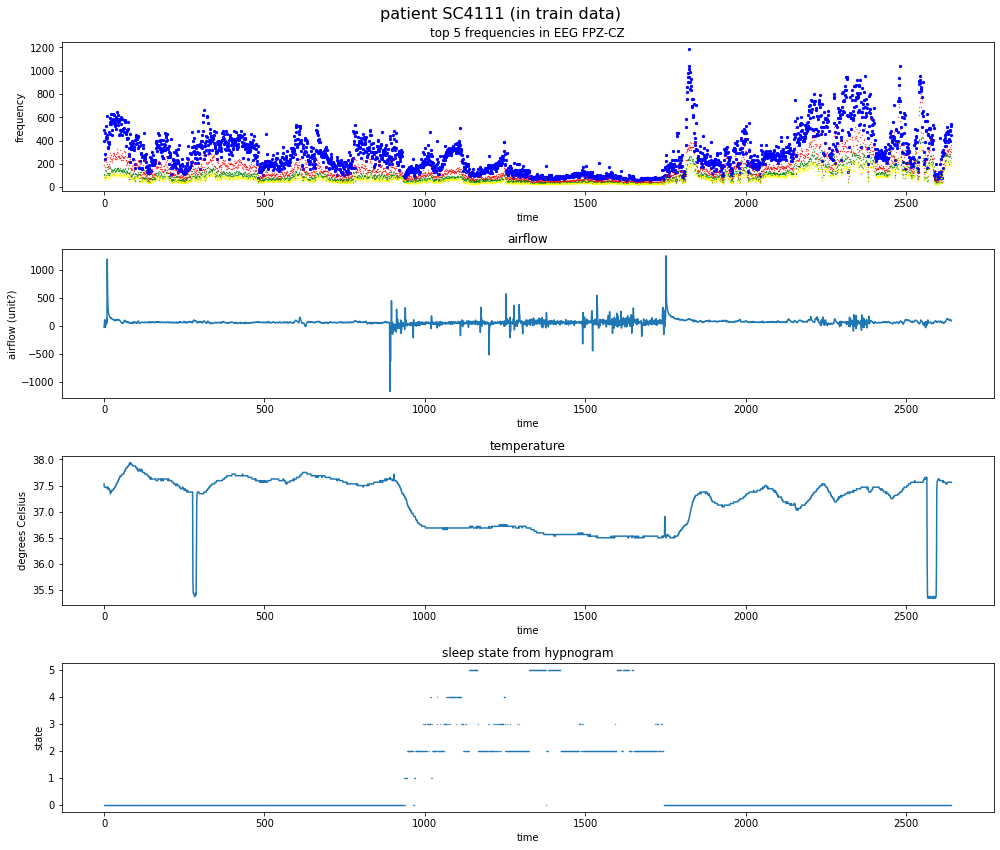

In [16]:
patient_name = 'SC4111'
patient = data[patient_name]

# Number of time steps, number of columns
T, C = patient.shape
print(T, C)

fig, axs = plt.subplots(4, 1, figsize=(14, 12))

ax = axs[0]
ticks = range(T)
ax.scatter(ticks, np.abs(patient[:,0]), s=5, color='blue')
ax.scatter(ticks, patient[:, 1], s=0.1, color='red')
ax.scatter(ticks, patient[:, 2], s=0.1, color='green')
ax.scatter(ticks, patient[:, 3], s=0.1, color='yellow')
# ax.scatter(ticks, patient[:, 8], s=0.1, color='black')
ax.set_title(f'top 5 frequencies in {labels[0][:-6]}')
ax.set_ylabel('frequency')
ax.set_xlabel('time')

ax = axs[1]
ax.plot(patient[:, -3])
ax.set_title('airflow')
ax.set_ylabel('airflow (unit?)')
ax.set_xlabel('time')

ax = axs[2]
ax.plot(patient[:, -2])
ax.set_title('temperature')
ax.set_ylabel('degrees Celsius')
ax.set_xlabel('time')

ax = axs[3]
ax.scatter(range(T), patient[:, -1], s=0.1)
ax.set_title('sleep state from hypnogram')
ax.set_ylabel('state')
ax.set_xlabel('time')

fig.suptitle(f'patient {patient_name} (in train data)', fontsize=16)
fig.tight_layout()
fig.show()

(809,)
(809, 2) (809, 65)


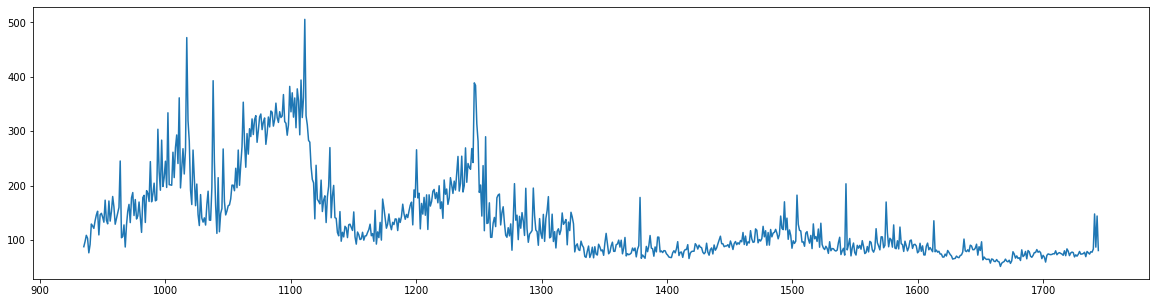

In [17]:
"""Reservoir Computer on Patient SC4111"""
patient_name = 'SC4111'
patient = data[patient_name]

# Number of time steps, number of columns
T, C = patient.shape

# Analyze just the sleep time
sleep_start = np.argmax(patient[:, -1] > 0)
sleep_end = T - np.argmax(patient[:, -1][::-1] > 0)
patient_sleep = np.abs(patient[sleep_start:sleep_end])
n = len(patient_sleep[:, -1])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)
print(t.shape)

# Time Series with first channel
u = CubicSpline(t, patient_sleep[:,:2])

print(u(t).shape, patient_sleep.shape)
plt.plot(t, patient_sleep[:,0])

U_train = u(t[:200])

### Begin Reservoir Computing

In [18]:
# Begin the Reservoir Computing

# Parameters
dim = 2
n = 50
gamma = 5
sigma = 0.14
alpha = 1e-6
rho = 3
mean_degree = 1
density = mean_degree / n

# Adjacency matrix with zero edges
# A = np.zeros((n, n))
A = (np.random.rand(n, n) < density).astype(float)

######################################################
# The rest of the code is exactly the same as before #
######################################################

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:200])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[200:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

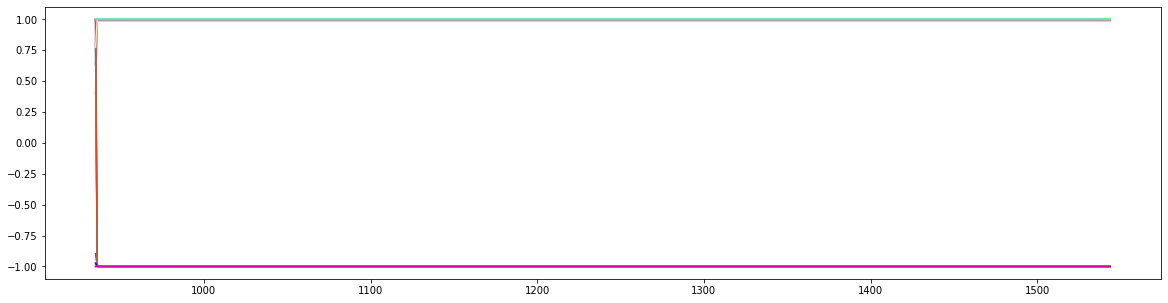

In [19]:
plt.rcParams["figure.figsize"] = [20, 5]
rc.plot2d(t[:609], pred_states)
plt.show()

(609,) (609, 2)
264048.15707101766


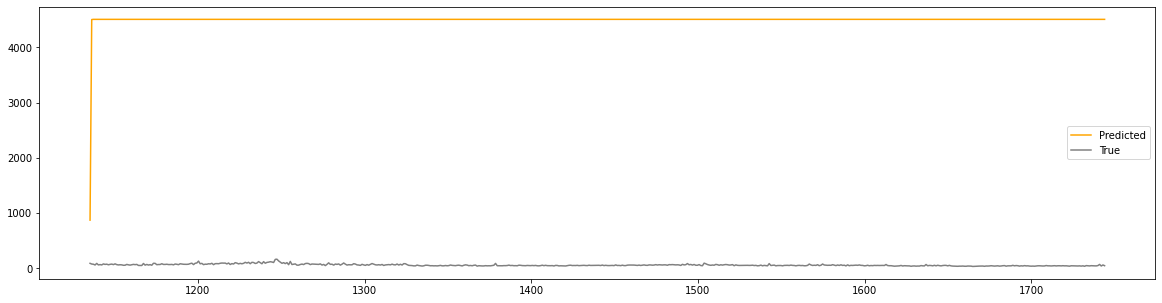

In [20]:
test_t = t[200:]
print(test_t.shape, U_pred.T.shape)
plt.rcParams["figure.figsize"] = [20, 5]
plt.plot(test_t, U_pred.T[:,1], c="orange", label="Predicted")
plt.plot(test_t, u(test_t)[:,1], c="gray", label="True")
print(np.linalg.norm(U_pred.T - u(test_t)))
plt.legend()
plt.show()

### Rework the Data and Train on Original Samples  

In [21]:
import pyedflib
from pyedflib import highlevel
from scipy.signal import detrend
import pandas as pd

In [22]:
signals, signal_headers, header = highlevel.read_edf('SC4011E0-PSG.edf')

7
(2, 8406000)
[0.00108582 0.0010911  0.00109359 ... 0.00095462 0.0009572  0.00095939]


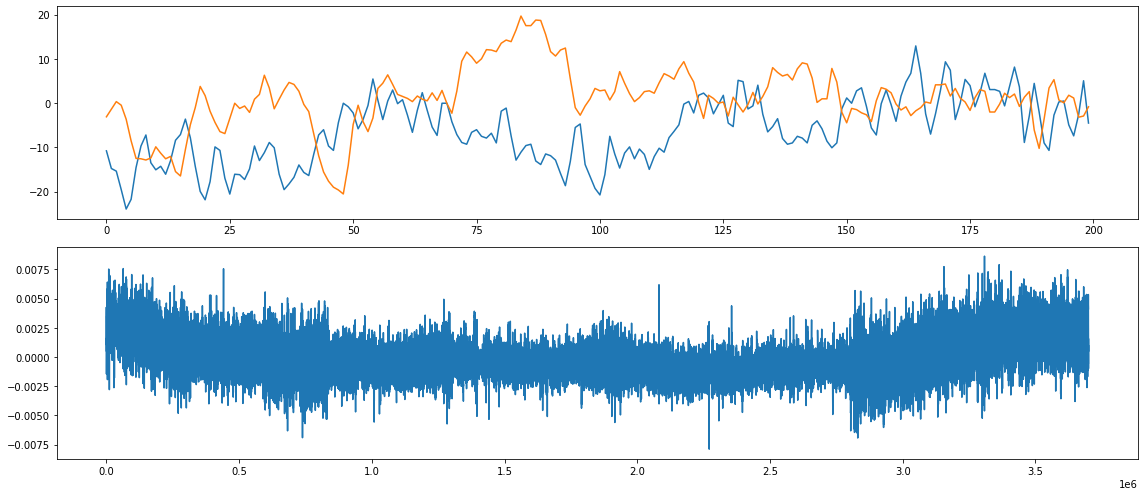

In [23]:
print(len(signals))
# plt.plot(signals[4][22000:25000])

signal = np.array(signals[0:2])
print(signal.shape)

plt.figure(figsize=(16,7))
plt.subplot(211)
plt.plot(signal[0,2200000:2200200])
plt.plot(signal[1,2200000:2200200])
# plt.plot(signal[0,:])

plt.subplot(212)
window_size = 1_000_000
 
# Convert array of integers to pandas series
numbers_series = pd.Series(signal[0,1_300_000:6_000_000])
 
# Get the window of series
# of observations of specified window size
windows = numbers_series.rolling(window_size)
 
# Create a series of moving
# averages of each window
moving_averages = windows.mean()
 
# Convert pandas series back to list
moving_averages_list = moving_averages.tolist()
 
# Remove null entries from the list
final_list = detrend(moving_averages_list[window_size - 1:])

print(final_list)

plt.plot(final_list)


plt.tight_layout()
plt.show()

(300, 2)
(300,) (2, 300)


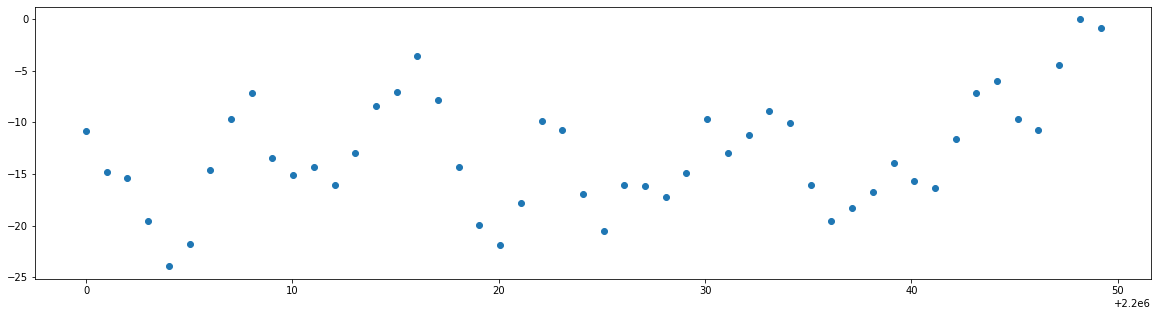

In [93]:
"""Reservoir Computer on Patient SC4111 Original PCG Data"""

signal = np.array(signals[:2])
sleep_start = 2_200_000
sleep_end = 2_200_300
patient_sleep = signal[:,sleep_start:sleep_end]
n = len(patient_sleep[0,:])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep.T)

print(u(t).shape)
print(t.shape, patient_sleep.shape)
plt.scatter(t[:50], patient_sleep[0,:50])

U_train = u(t[:200])

In [97]:
# Begin the Reservoir Computing

# Parameters
dim = 2
n = 50
gamma = 5
sigma = 0.14
alpha = 1e-6
rho = 2
mean_degree = 1
density = mean_degree / n

# Adjacency matrix with zero edges
# A = np.zeros((n, n))
A = (np.random.rand(n, n) < density).astype(float)

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:200])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[200:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

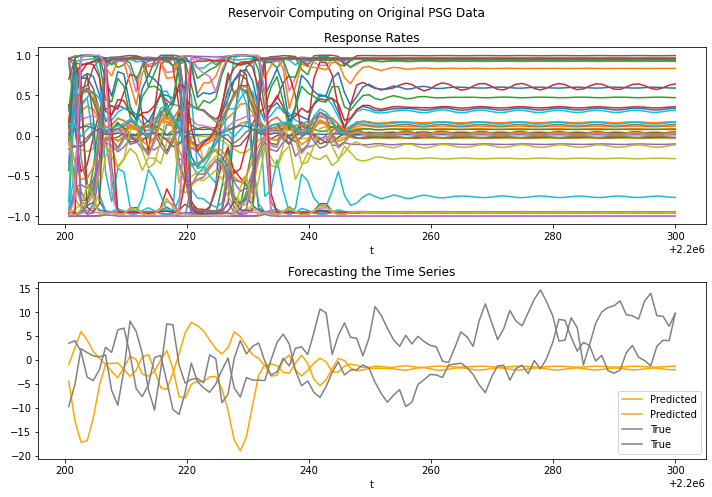

In [100]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.subplot(211)
plt.title("Response Rates")
plt.xlabel("t")
plt.plot(t[200:], pred_states)

test_t = t[200:]
plt.subplot(212)
plt.title("Forecasting the Time Series")
plt.plot(test_t, U_pred.T[:], c="orange", label="Predicted")
plt.plot(test_t, u(test_t)[:], c="gray", label="True")
plt.xlabel("t")
plt.legend()


plt.suptitle("Reservoir Computing on Original PSG Data")
plt.tight_layout()
plt.savefig("reservoir_psg_good.pdf")
plt.show()

### Seek to do moving averages and mask out noise from brain

(400, 3)
(400, 3)
(400,) (400, 3)


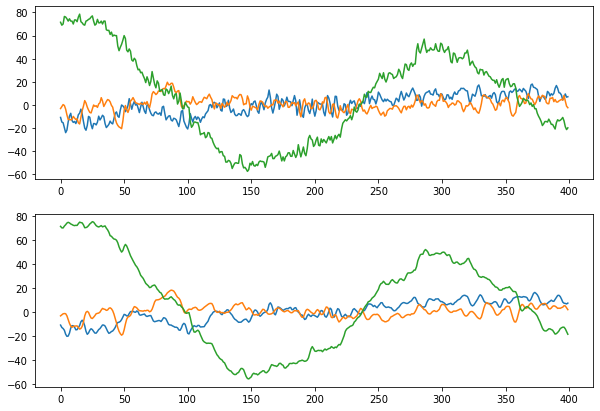

In [101]:
"""Reservoir Computer on Patient SC4111 Original PCG Data"""

signal = np.array(signals[:3])
window_size = 4
sleep_start = 2_200_000
sleep_end = 2_200_400
 
# Convert array of integers to pandas series
signal_dataframe = pd.DataFrame((signal[:,sleep_start:sleep_end]).T, columns=['0', '1', '2'])

plt.subplot(211)
plt.plot(range(400), signal_dataframe['0'])
plt.plot(range(400), signal_dataframe['1'])
plt.plot(range(400), signal_dataframe['2'])
 
# Get the window of series
# of observations of specified window size and compute mean
moving_averages = signal_dataframe.rolling(window_size, min_periods=1, axis=0).mean()
moving_averages.dropna(inplace=True)
plt.subplot(212)
plt.plot(range(400), moving_averages['0'])
plt.plot(range(400), moving_averages['1'])
plt.plot(range(400), moving_averages['2'])

# patient_sleep = detrend(moving_averages)
patient_sleep = moving_averages.values
print(patient_sleep.shape)
n = len(patient_sleep[:,0])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep)

print(u(t).shape)
print(t.shape, patient_sleep.shape)

U_train = u(t[:200])

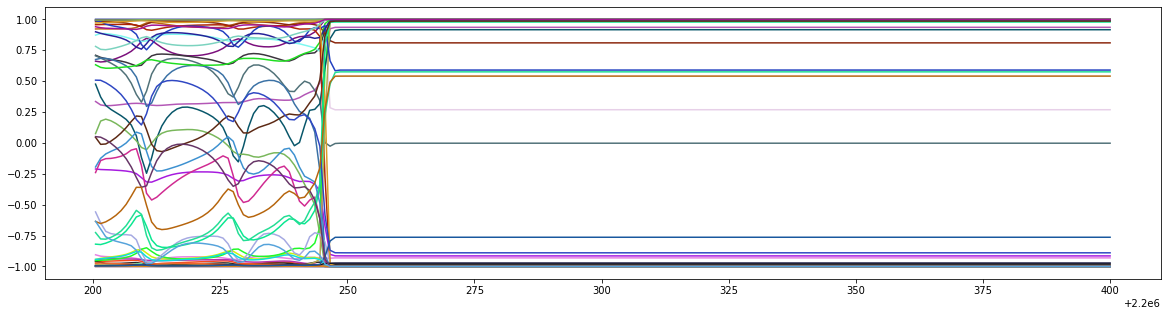

In [150]:
# Begin the Reservoir Computing

# Parameters
dim = 3
n = 50
gamma = 5
sigma = 0.14
alpha = 1e-6
rho = 2
mean_degree = 1
density = mean_degree / n

# Adjacency matrix with zero edges
# A = np.zeros((n, n))
A = (np.random.rand(n, n) < density).astype(float)

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:200])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[200:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

plt.rcParams["figure.figsize"] = [20, 5]
rc.plot2d(t[200:], pred_states)
plt.show()

(200,) (200, 3)
1880.8127521476706


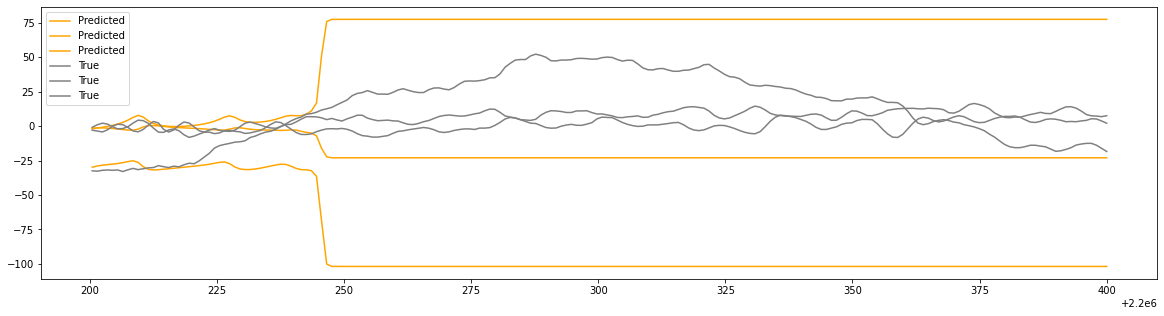

In [151]:
test_t = t[200:]
print(test_t.shape, U_pred.T.shape)
plt.rcParams["figure.figsize"] = [20, 5]
plt.plot(test_t, U_pred.T[:], c="orange", label="Predicted")
plt.plot(test_t, u(test_t)[:], c="gray", label="True")
print(np.linalg.norm(U_pred.T - u(test_t)))
plt.legend()
plt.show()

### Implementing Results from Gridsearch

/usr/lib/python3/dist-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


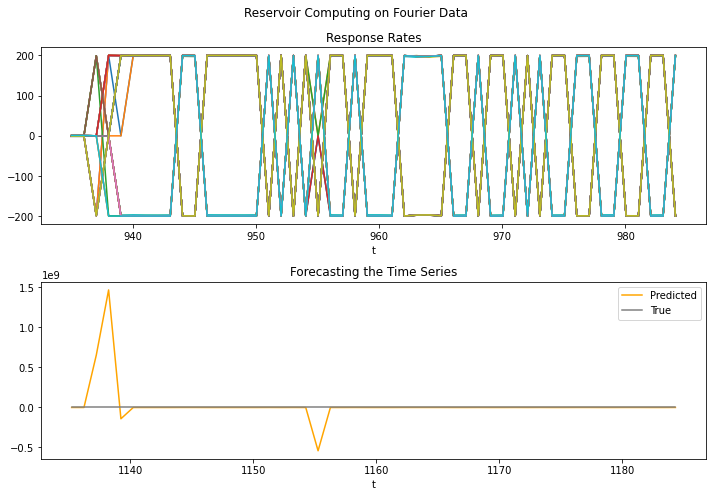

In [32]:
"""Results for Fourier Data"""
patient_name = 'SC4111'
patient = data[patient_name]

# Number of time steps, number of columns
T, C = patient.shape

# Analyze just the sleep time
sleep_start = np.argmax(patient[:, -1] > 0)
sleep_end = T - np.argmax(patient[:, -1][::-1] > 0)
patient_sleep = np.abs(patient[sleep_start:sleep_end])
n = len(patient_sleep[:, -1])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep[:,:2])

U_train = u(t[:200])
# Begin the Reservoir Computing
n, p_thin, erdos_c, gamma, rho, sigma, alpha = 50, 0.2, 4, 10, 10, 10, 0.01
dim = 2

# Connected Matrix
conn_prob = erdos_c / n + 1

# Adjacency Matrix with Directed Erdos-Renyi adjacency matrix
A_connected = nx.erdos_renyi_graph(n,conn_prob,directed=True)
num_edges = len(A_connected.edges)
A_connected = sparse.dok_matrix(nx.adjacency_matrix(A_connected).T)

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:200])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[200:250])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

plt.rcParams["figure.figsize"] = [10, 7]
plt.subplot(211)
plt.title("Response Rates")
plt.xlabel("t")
plt.plot(t[:50], pred_states)

test_t = t[200:250]
plt.subplot(212)
plt.title("Forecasting the Time Series")
plt.plot(test_t, U_pred.T[:,1], c="orange", label="Predicted")
plt.plot(test_t, u(test_t)[:,1][:50], c="gray", label="True")
plt.xlabel("t")
plt.legend()

plt.suptitle("Reservoir Computing on Fourier Data")
plt.tight_layout()
plt.savefig("reservoir_fourier.pdf")
plt.show()

/usr/lib/python3/dist-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


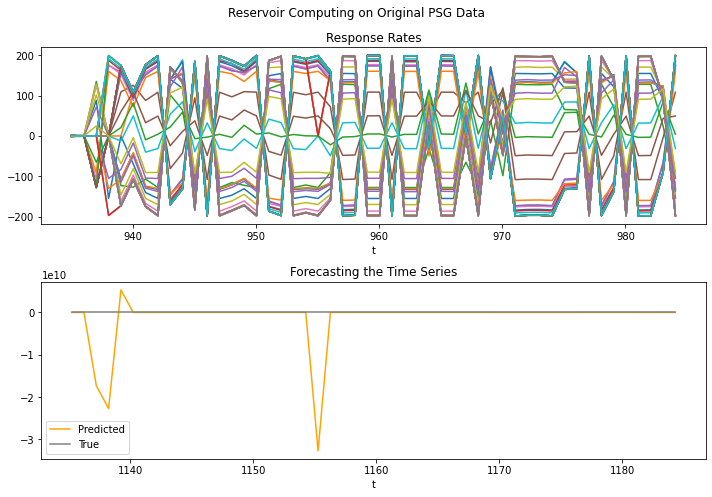

In [33]:
"""Results for Original PSG Data"""

# (n, p_thin, erdos_c, gamma, rho, sigma, alpha) score
# mse_thinned: (50, 0.2, 4, 2, 5, 0.14, 0.01), 310.15840997497
# mse_connected: (50, 0.2, 3, 1, 5, 0.14, 0.01), 175.49300066303996

signal = np.array(signals[:3])
window_size = 4
sleep_start = 2_200_000
sleep_end = 2_200_400
 
# Convert array of integers to pandas series
signal_dataframe = pd.DataFrame((signal[:,sleep_start:sleep_end]).T, columns=['0', '1', '2'])
 
# Get the window of series
# of observations of specified window size and compute mean
moving_averages = signal_dataframe.rolling(window_size, min_periods=1, axis=0).mean()
moving_averages.dropna(inplace=True)

# patient_sleep = detrend(moving_averages)
patient_sleep = moving_averages.values
n = len(patient_sleep[:,0])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep)

U_train = u(t[:200])

# Number of time steps, number of columns
T, C = patient.shape

# Analyze just the sleep time
sleep_start = np.argmax(patient[:, -1] > 0)
sleep_end = T - np.argmax(patient[:, -1][::-1] > 0)
patient_sleep = np.abs(patient[sleep_start:sleep_end])
n = len(patient_sleep[:, -1])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep[:,:2])

U_train = u(t[:200])
# Begin the Reservoir Computing
n, p_thin, erdos_c, gamma, rho, sigma, alpha = 50, 0.2, 3, 1, 5, 0.14, 0.01
dim = 2

# Connected Matrix
conn_prob = erdos_c / n + 1

# Adjacency Matrix with Directed Erdos-Renyi adjacency matrix
A_connected = nx.erdos_renyi_graph(n,conn_prob,directed=True)
num_edges = len(A_connected.edges)
A_connected = sparse.dok_matrix(nx.adjacency_matrix(A_connected).T)

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:200])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[200:250])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

plt.rcParams["figure.figsize"] = [10, 7]
plt.subplot(211)
plt.title("Response Rates")
plt.xlabel("t")
plt.plot(t[:50], pred_states)

test_t = t[200:250]
plt.subplot(212)
plt.title("Forecasting the Time Series")
plt.plot(test_t, U_pred.T[:,1], c="orange", label="Predicted")
plt.plot(test_t, u(test_t)[:,1][:50], c="gray", label="True")
plt.xlabel("t")
plt.suptitle("Reservoir Computing on Original PSG Data")
plt.legend()

plt.tight_layout()
plt.savefig("reservoir_psg.pdf")
plt.show()

/usr/lib/python3/dist-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


<Figure size 20480x5120 with 0 Axes>

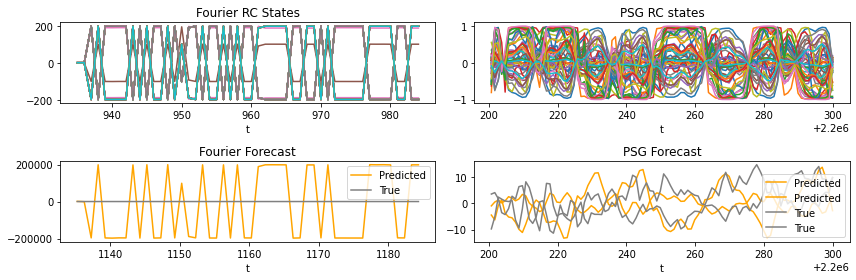

In [240]:
"""Create a Quad Plot of the good and the bad"""

"""Results for Fourier Data"""
patient_name = 'SC4111'
patient = data[patient_name]

# Number of time steps, number of columns
T, C = patient.shape

# Analyze just the sleep time
sleep_start = np.argmax(patient[:, -1] > 0)
sleep_end = T - np.argmax(patient[:, -1][::-1] > 0)
patient_sleep = np.abs(patient[sleep_start:sleep_end])
n = len(patient_sleep[:, -1])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep[:,:2])

U_train = u(t[:200])
# Begin the Reservoir Computing
n, p_thin, erdos_c, gamma, rho, sigma, alpha = 50, 0.2, 4, 10, 10, 10, 0.01
dim = 2

# Connected Matrix
conn_prob = erdos_c / n + 1

# Adjacency Matrix with Directed Erdos-Renyi adjacency matrix
A_connected = nx.erdos_renyi_graph(n,conn_prob,directed=True)
num_edges = len(A_connected.edges)
A_connected = sparse.dok_matrix(nx.adjacency_matrix(A_connected).T)
A_connected = (np.random.rand(n, n) < density).astype(float)

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A_connected @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:200])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A_connected @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[200:250])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

plt.gcf().set_dpi(1024)
plt.figure(figsize=(12, 4))

plt.subplot(221)
plt.title("Fourier RC States")
plt.plot(t[:50], pred_states)
plt.xlabel("t")

test_t = t[200:250]
plt.subplot(223)
plt.title("Fourier Forecast")
plt.plot(test_t, U_pred.T[:,1], c="orange", label="Predicted")
plt.plot(test_t, u(test_t)[:,1][:50], c="gray", label="True")
plt.xlabel("t")
plt.legend()




"""Results for Original PSG Data"""

"""Reservoir Computer on Patient SC4111 Original PCG Data"""

signal = np.array(signals[:2])

sleep_start = 2_200_000
sleep_end = 2_200_300
patient_sleep = signal[:,sleep_start:sleep_end]
n = len(patient_sleep[0,:])

# Training Data
t = np.linspace(sleep_start, sleep_end, n)

# Time Series with first channel
u = CubicSpline(t, patient_sleep.T)

U_train = u(t[:200])

# Parameters
dim = 2
n = 50
gamma = 5
sigma = 0.14
alpha = 1e-6
rho = 2
mean_degree = 1
density = mean_degree / n

# Adjacency matrix with zero edges
# A = np.zeros((n, n))
A = (np.random.rand(n, n) < density).astype(float)

# Fixed random matrix
W_in = np.random.rand(n, dim) - .5

# ODE IVP definition and numerical solution
drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ u(t)))
r0 = np.random.rand(n)
states = integrate.odeint(drdt, r0, t[:200])

# Training step. Project training data onto reservoir states 
W_out =  U_train.T @ states @ np.linalg.inv(states.T @ states )

# Prediction ODE IVP definition and solution
trained_drdt = lambda r, t : gamma * (-r + np.tanh(rho * A @ r + sigma * W_in @ W_out @ r))
r0_pred = states[-1, :]
pred_states = integrate.odeint(trained_drdt, r0_pred, t[200:])

# Map reservoir states onto the dynamical system space
U_pred = W_out @ pred_states.T

test_t = t[200:]
plt.subplot(222)
plt.title("PSG RC states")
plt.xlabel("t")
plt.plot(test_t, pred_states)


plt.subplot(224)
plt.title("PSG Forecast")
plt.plot(test_t, U_pred.T[:], c="orange", label="Predicted")
plt.plot(test_t, u(test_t)[:], c="gray", label="True")
plt.xlabel("t")
plt.legend()

plt.tight_layout()
plt.savefig("reservoir_combined8.pdf")
plt.show()